In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

#Importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Display all the columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#Loading the train data
train = pd.read_csv('train.csv')
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
test=pd.read_csv('test.csv')
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [5]:
#Checking the shape of the train dataset
print("There are {} observation and {} features in train dataset.\n".format(train.shape[0],train.shape[1]))

There are 159571 observation and 8 features in train dataset.



In [6]:
#Checking the inormation of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Observation:

    1-Information shows that there are no null values present in our dataset.
    2-ID and Comment_text feature is only object datatype and rest all the features are integer datatype. 

# Checking the Missing Values

In [7]:
#Checking the missing values in the dataset
train.isnull().values.any()

False

In [8]:
#Checking the missing values in columns
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

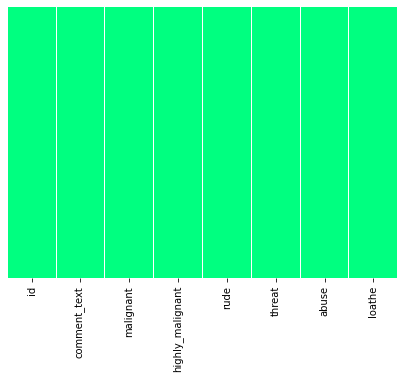

In [9]:
#Seeing the missing values via visualization
plt.figure(figsize=(7,5))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='winter_r',)
plt.show()

Observation:

There are no missing values in our train dataset.So to visualize the missing number in bar plot we have to
import the missingno as mnso.

In [10]:
#Checking the number of unique comments
print("There are {} unique comments in this dataset".format(train.comment_text.nunique()))

There are 159571 unique comments in this dataset


# Summary Statistics

In [11]:
# Summary Statistics
print("Summary Statistics of the train data:")
train.describe()

Summary Statistics of the train data:


,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# Checking the summary of object columns
train.describe(include=['object'])

,id,comment_text
count,159571,159571
unique,159571,159571
top,f254f8efdaa53130,"""under the """"personal life"""" section, it says ..."
freq,1,1


# Observation:

1-There are 159571 comments in our comment_text column and all are unique. There are no duplicate data present in the
  dataset.
  
2-There are six label columns according to the comment type. In future we transform all these six features into single 
  feature.

In [13]:
#Printing the object data types and their unique values

for column in train.columns:
    if train[column].dtype==object:
        print("Seeing the Object features\n")
        print(str(column) + ' : ' + str(train[column].nunique()))
        print('*********************************************************') 
    if train[column].dtype=='int64':
        print("Seeing the Interger features\n")
        print(str(column) + ' : ' + str(train[column].nunique()))
        print("Unique Values:",train[column].unique())
        print('**********************************************************')

Seeing the Object features

id : 159571
*********************************************************
Seeing the Object features

comment_text : 159571
*********************************************************
Seeing the Interger features

malignant : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

highly_malignant : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

rude : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

threat : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

abuse : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

loathe : 2
Unique Values: [0 1]
**********************************************************


# To Check the Correlation

In [14]:
#Seeing the correlation
train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


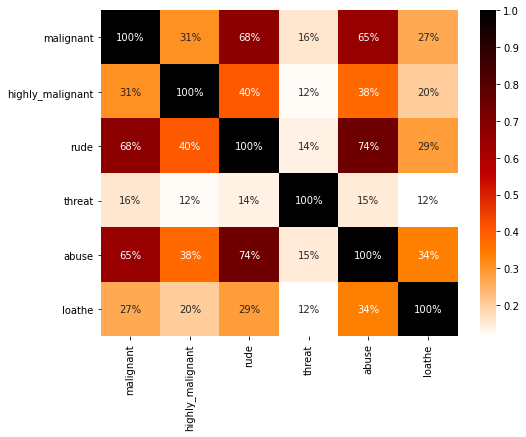

In [15]:
#Seeing the correlation via visualization
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(),annot=True,fmt='.0%',cmap='gist_heat_r')
plt.show()

<Figure size 1440x576 with 0 Axes>

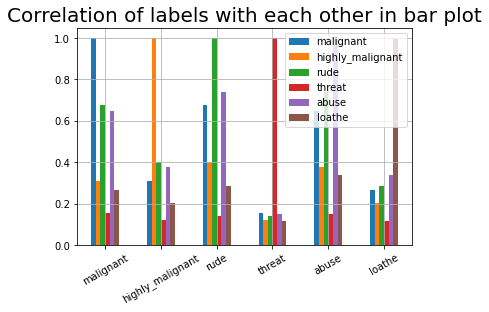

In [16]:
#Checking the correlation of labels in bar plot
plt.figure(figsize=(20,8))
train.corr(method='pearson').plot(kind='bar',grid=True)
plt.xticks(rotation='30')
plt.title("Correlation of labels with each other in bar plot",fontsize=20)
plt.show()

Counting of labels for: malignant
0    144277
1     15294
Name: malignant, dtype: int64 



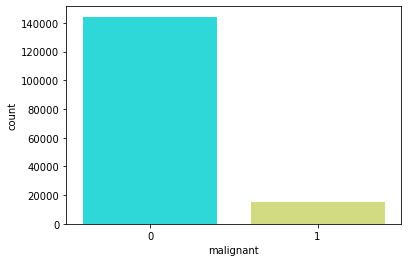

Counting of labels for: highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64 



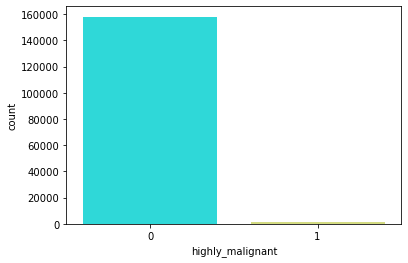

Counting of labels for: loathe
0    158166
1      1405
Name: loathe, dtype: int64 



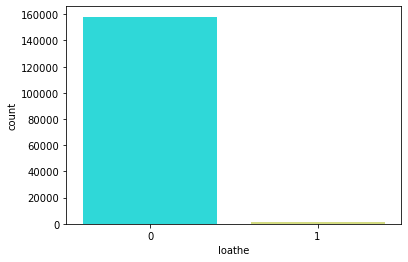

Counting of labels for: rude
0    151122
1      8449
Name: rude, dtype: int64 



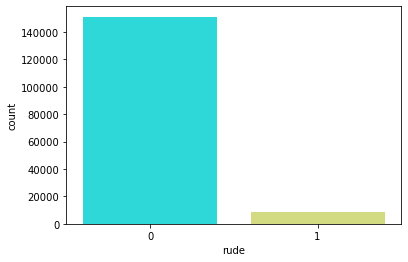

Counting of labels for: abuse
0    151694
1      7877
Name: abuse, dtype: int64 



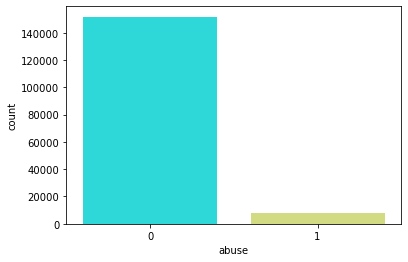

Counting of labels for: threat
0    159093
1       478
Name: threat, dtype: int64 



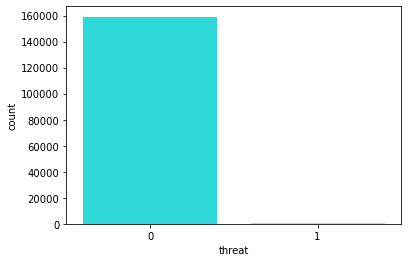

In [17]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print("Counting of labels for:", i)
    sns.countplot(train[i],palette='rainbow',saturation=0.95)
    print(train[i].value_counts(),'\n')
    plt.show()


Here we see the counting of values in each labels with their plot.

# Creating new target feature that is combination o all target features

In [18]:
target_cols = ['malignant','highly_malignant','rude','threat','abuse','loathe']

In [19]:
train[target_cols].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [20]:
target_label = train[target_cols]
train['label'] = train[target_cols].sum(axis=1)

In [21]:
train.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0


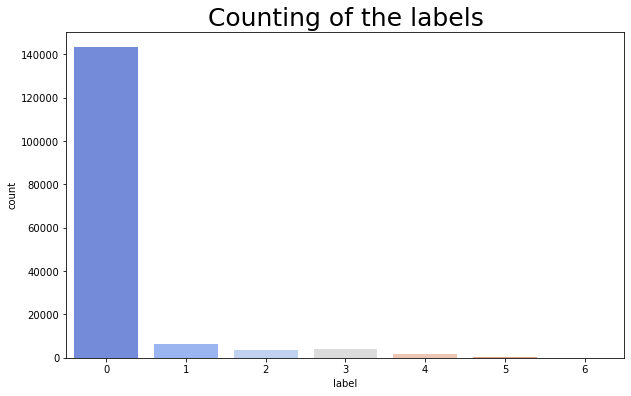

In [22]:
#Checking the counting of labels
plt.figure(figsize=(10,6))
sns.countplot(train['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [23]:
train['label'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

# Scaling the target feature that is label

In [24]:
train['label'] = train['label'] >0
train['label'] = train['label'].astype(int)

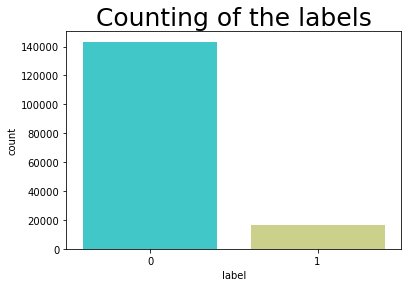

In [25]:
#Checking the counting of labels
#plt.figure(figsize=(10,6))
sns.countplot(train['label'], palette='rainbow')
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [26]:

train['label'].value_counts()

0    143346
1     16225
Name: label, dtype: int64

In [27]:
# Creating the new column before cleaning the comment_text column
train['comment_length'] = train['comment_text'].str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67


Data Cleaning Steps for comment_text column
Remove HTML tags

Remove special characters

Convert everything to lowercase

Remove stopwords

Lemmatization

In [28]:
import nltk
import string
from nltk.corpus import stopwords

In [29]:
# 1-Removing the HTML tags
# Regex rule : "<.*?>"

import re

def clean(text):
    cleaned = re.compile(r"<.*?>")
    return re.sub(cleaned," ",text)

train.comment_text = train.comment_text.apply(clean)
train.comment_text[1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [30]:
# 2- Removing special character like punctuation
# We can use string.punctuation or manually

def is_special(text):
    empty = ''
    for i in text:
        if i.isalpha():
            empty = empty + i
        else:
            empty = empty + ' '
    return empty

train.comment_text = train.comment_text.apply(is_special)
train.comment_text[1]

'D aww  He matches this background colour I m seemingly stuck with  Thanks    talk         January           UTC '

In [31]:
#3-Converting everything to lowercase

def lower(text):
    return text.lower()

train.comment_text = train.comment_text.apply(lower)
train.comment_text[1]

'd aww  he matches this background colour i m seemingly stuck with  thanks    talk         january           utc '

In [32]:
# 4-Removing the stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','yo','Ja'])
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

train.comment_text = train.comment_text.apply(remove_stopwords)
train.comment_text[1]

['aww',
 'matches',
 'background',
 'colour',
 'seemingly',
 'stuck',
 'thanks',
 'talk',
 'january',
 'utc']

In [33]:
# 5-Lemmatization
from nltk.stem import WordNetLemmatizer

def lema_text(text):
    lema = WordNetLemmatizer()
    return " ".join([lema.lemmatize(w) for w in text])

train.comment_text = train.comment_text.apply(lema_text)
train.comment_text[1]

'aww match background colour seemingly stuck thanks talk january utc'

In [34]:
# Creating new column (cleaned_text) after removing puncuations,stopwords from news column to check how much data is cleaned
train['cleaned_text'] = train.comment_text.str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,cleaned_text
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,0,67,29


In [35]:
# Total length removal
print("Origional Length:",train.comment_length.sum())
print("Cleaned Length:",train.cleaned_text.sum())
print("Total Words Removed:",(train.comment_length.sum()) - (train.cleaned_text.sum()))

Origional Length: 62893130
Cleaned Length: 38788758
Total Words Removed: 24104372


Observation: Here we see the origional length of our comment_text column and cleaned length of our comment_text columns and their difference means how much data is cleaned

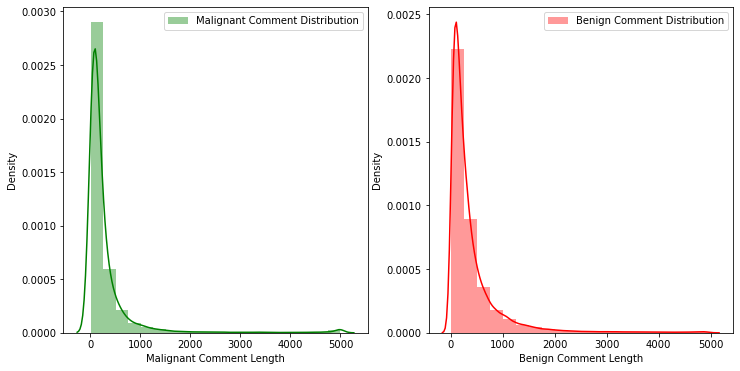

In [36]:
#Plotting the distribution of comment beore cleaning the comment_text column
f,ax = plt.subplots(1,2,figsize=(12,6))

sns.distplot(train[train['label']==1]['comment_length'],bins=20, ax=ax[0],label='Malignant Comment Distribution',color='g')
ax[0].set_xlabel('Malignant Comment Length')
ax[0].legend()

sns.distplot(train[train['label']==0]['comment_length'],bins=20, ax=ax[1],label='Benign Comment Distribution',color='r')
ax[1].set_xlabel('Benign Comment Length')
ax[1].legend()

plt.show()

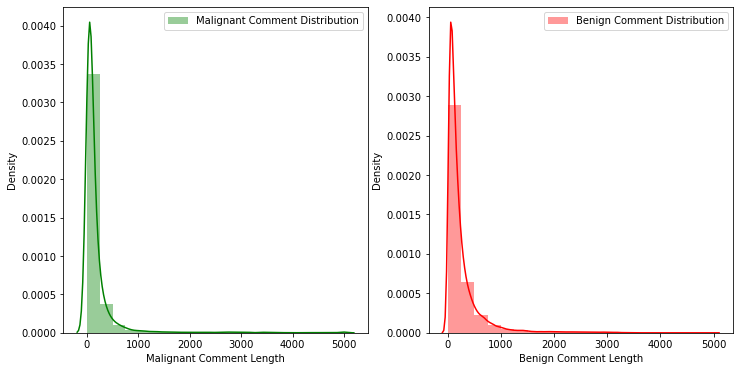

In [37]:
#Plotting the distribution of comment after cleaning the comment_text column
f,ax = plt.subplots(1,2,figsize=(12,6))

sns.distplot(train[train['label']==1]['cleaned_text'],bins=20, ax=ax[0],label='Malignant Comment Distribution',color='g')
ax[0].set_xlabel('Malignant Comment Length')
ax[0].legend()

sns.distplot(train[train['label']==0]['cleaned_text'],bins=20, ax=ax[1],label='Benign Comment Distribution',color='r')
ax[1].set_xlabel('Benign Comment Length')
ax[1].legend()

plt.show()

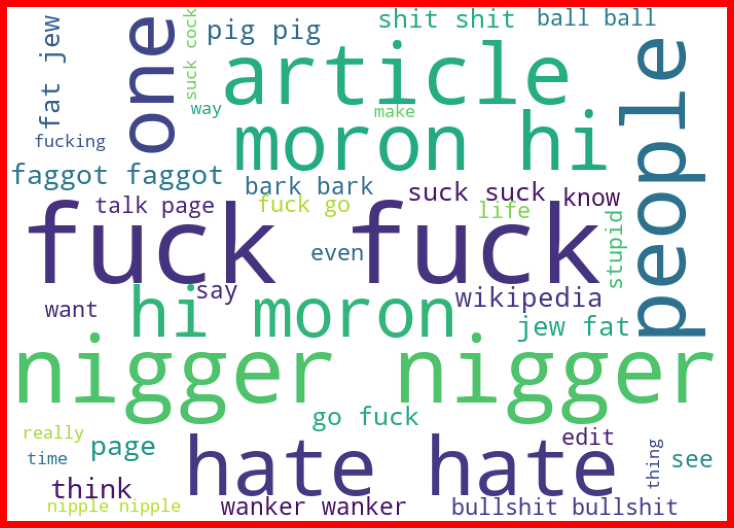

In [38]:
#Getting sense of loud words for Malignant Comments in label column

from wordcloud import WordCloud


spams = train['comment_text'][train['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=40).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

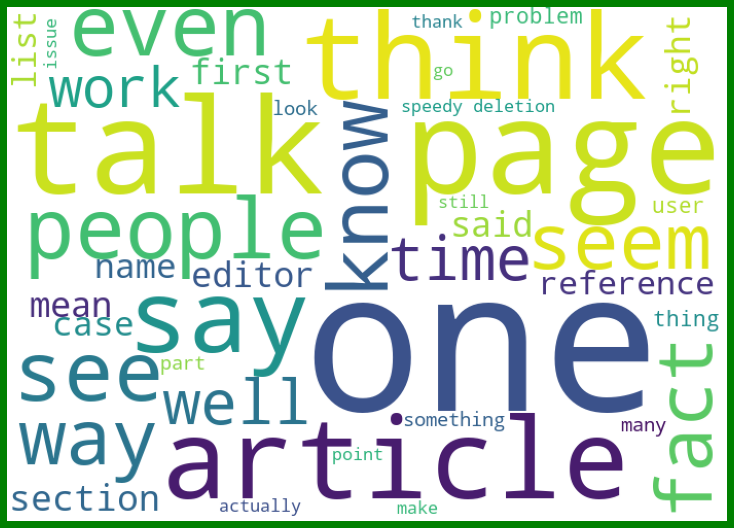

In [39]:
#Getting sense of loud words for Benign Comments in label column

from wordcloud import WordCloud


spams = train['comment_text'][train['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=40).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

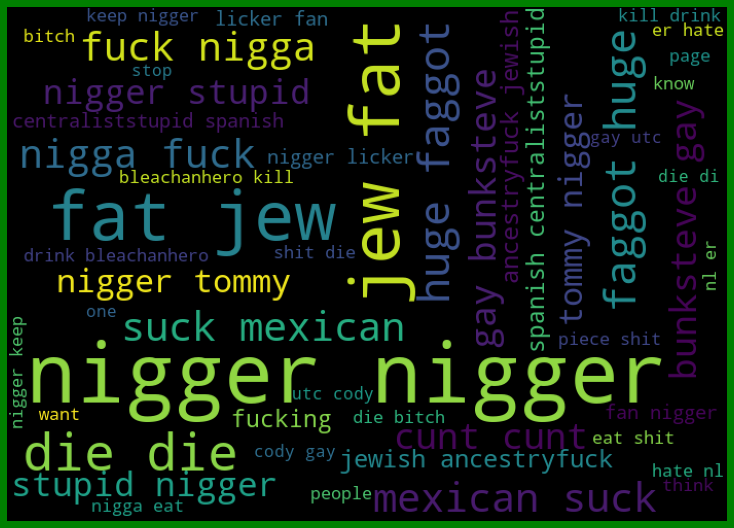

In [40]:
#Getting sense of loud words which are offensive for loathe label

offensive = train['comment_text'][train['loathe']==1]
spam_cloud = WordCloud(width=700,height=500,background_color='black',max_words=50).generate(' '.join(offensive))
plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

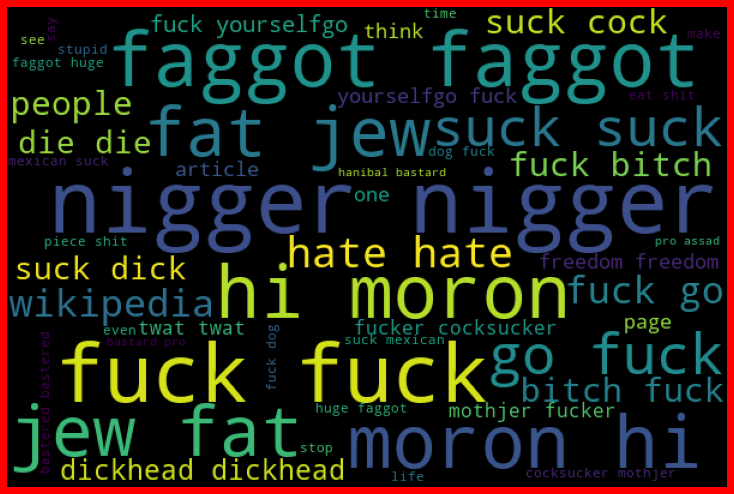

In [41]:
#Getting sense of loud words which are offensive for abuse label

offensive = train['comment_text'][train['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(offensive))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Converting the text into vectors using TF-IDF Vectorizer

In [42]:
# Importing the library and converting it into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [43]:
#Independent Features
x = tf_vec.fit_transform(train['comment_text'])
#Dependent Feature
y = train['label']

In [44]:
#seprating database into train test slpit
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=0.20)

# Models

In [47]:
#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,f1_score

In [48]:
#testing Different Models
model=[DecisionTreeClassifier(), LogisticRegression(), KNeighborsClassifier()]
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    #Printing Model Score
    print('Model Score =', i.score(x_train,y_train))
    print('\n')
    
    #Printing Accuracy Score
    acc = accuracy_score(y_test,pred)
    print('Accuracy Score =', acc )
    print('\n')
    
    #Printing Confusion Matrix
    print('Counfusion Matix')
    print(confusion_matrix(y_test,pred))
    print('\n')
    
    #Printing Classification Report
    print('Classification Report')
    print(classification_report(y_test,pred))
    print('\n')
    
    #Printing AUC ROC Score
    roc_auc = roc_auc_score(y_test,pred)
    print('Auc Roc Score =', roc_auc )
    print('\n')
    
    #Printing Cross Validation Score
    cross = cross_val_score(i,x,y,cv=5).mean()
    print('Cross Val Score =', cross )
    print('\n')
    print('_______________________________________________________________________________________________________________')

DecisionTreeClassifier()
Model Score = 0.9990051388105534


Accuracy Score = 0.9428481905060316


Counfusion Matix
[[27804   867]
 [  957  2287]]


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     28671
           1       0.73      0.70      0.71      3244

    accuracy                           0.94     31915
   macro avg       0.85      0.84      0.84     31915
weighted avg       0.94      0.94      0.94     31915



Auc Roc Score = 0.8373771099149796


Cross Val Score = 0.9409103099233741


_______________________________________________________________________________________________________________
LogisticRegression()
Model Score = 0.9600567149213511


Accuracy Score = 0.956384145386182


Counfusion Matix
[[28511   160]
 [ 1232  2012]]


Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28671
           1       0.93      0.62      

In [ ]:
LogisticRegression gives better result but we can further increase it by using ensembel technique

# Ensembel Technique

In [49]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier , GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier

In [50]:
#testing Different Models
model=[RandomForestClassifier(), AdaBoostClassifier() , GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier() ]

for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    #Printing Model Score
    print('Model Score =', i.score(x_train,y_train))
    print('\n')
    
    #Printing Accuracy Score
    acc = accuracy_score(y_test,pred)
    print('Accuracy Score = ', acc )
    print('\n')
    
    #Printing Confusion Matrix
    print('Counfusion Matix')
    print(confusion_matrix(y_test,pred))
    print('\n')
    
    #Printing Classification Report
    print('Classification Report')
    print(classification_report(y_test,pred))
    print('\n')
    
    #Printing AUC ROC Score
    roc_auc = roc_auc_score(y_test,pred)
    print('Auc Roc Score =', roc_auc )
    print('\n')
    
    #Printing Cross Validation Score
    cross = cross_val_score(i,x,y,cv=5).mean()
    print('Cross Val Score =' , cross )
    print('\n')
    print('..................................................................................................................')
    


RandomForestClassifier()
Model Score = 0.9989894717052078


Accuracy Score =  0.9582641391195362


Counfusion Matix
[[28336   335]
 [  997  2247]]


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28671
           1       0.87      0.69      0.77      3244

    accuracy                           0.96     31915
   macro avg       0.92      0.84      0.87     31915
weighted avg       0.96      0.96      0.96     31915



Auc Roc Score = 0.8404895491308965


Cross Val Score = 0.9568718594547301


..................................................................................................................
AdaBoostClassifier()
Model Score = 0.9459093187942595


Accuracy Score =  0.9459188469371769


Counfusion Matix
[[28424   247]
 [ 1479  1765]]


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     28671
           1       0.88      0.54

KeyboardInterrupt: 

In [51]:
#calling Model
ec =RandomForestClassifier()


#fitting Train data in model
ec.fit(x_train,y_train)

#Predecting Values
pred=ec.predict(x_test)

#printing Matrics

#Printing Model Score
print('Model Score =', i.score(x_train,y_train))

#Printing Accuracy Score
print('Accuracy Score = ', accuracy_score(y_test,pred) )

#Printing AUC ROC Score
print('Auc Roc Score =', roc_auc_score(y_test,pred))
    
#Printing Confusion Matrix
print('Counfusion Matix')
print(confusion_matrix(y_test,pred))
    
#Printing Classification Report
print('Classification Report')
print(classification_report(y_test,pred))

Model Score = 0.9928636335150718
Accuracy Score =  0.9573868087106376
Auc Roc Score = 0.8374041127582826
Counfusion Matix
[[28327   344]
 [ 1016  2228]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     28671
           1       0.87      0.69      0.77      3244

    accuracy                           0.96     31915
   macro avg       0.92      0.84      0.87     31915
weighted avg       0.96      0.96      0.96     31915



Text(0.5, 1.0, 'ROC curve')

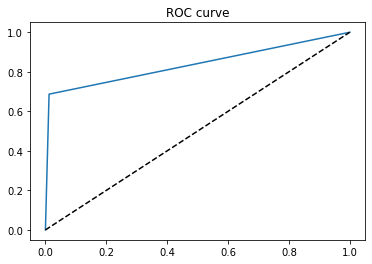

In [54]:
from sklearn.metrics import roc_curve
y_pred_prob=ec.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.title('ROC curve')

In [58]:

import eli5
eli5.show_weights(ec,vec = tf_vec, top = 15)  #random forest
# will give you top 15 features or words  which makes a comment toxic

Weight,Feature
0.0680 ± 0.0641,frequency
0.0338 ± 0.0382,fridge
0.0267 ± 0.0300,smoking
0.0211 ± 0.0194,teaching
0.0192 ± 0.0217,azeri
0.0186 ± 0.0145,tajiks
0.0185 ± 0.0122,idiocy
0.0159 ± 0.0150,amazingly
0.0135 ± 0.0129,denominations
0.0122 ± 0.0110,expressions


In [59]:
test_data =tf_vec.fit_transform(test['comment_text'])
test_data

<153164x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 3059650 stored elements in Compressed Sparse Row format>

In [60]:
prediction=ec.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
import joblib
joblib.dump(ec,"malig.pkl")

['malig.pkl']